**soal baru**  
data diambil dari https://github.com/hackathonBI/CCS

In [1]:
import pandas as pd

In [2]:
#products
pathProducts='CCS-master/sample data/products.csv'
#pathProducts='../M6/dataset-data-understanding-tugas-2/products.csv'
dfProducts = pd.read_csv(pathProducts)
dfProducts.head()

,ProductID,Description
0,1,Rucní zadání
1,10,Mazadla/Tuky
2,100,Membership-fee Consorcio
3,101,Diesel
4,102,Biodiesel


In [3]:
#sample
pathTransactions_1k='CCS-master/sample data/sample.csv'
#pathTransactions_1k='../M6/dataset-data-understanding-tugas-2/transactions_1k.csv'
dfTransactions_1k = pd.read_csv(pathTransactions_1k)
dfTransactions_1k.head()

,Date,Time,CustomerID,CardID,GasStationID,ProductID,Amount,Price
0,2012-01-01,00:18:00,41113,645177,363,2,93.75,2038.5750
1,2012-01-01,02:05:00,30766,496967,1083,2,132.10,3002.6920
2,2012-01-01,00:27:00,31576,618868,109,5,21.35,462.9240
3,2012-01-01,06:56:00,3800,598481,5298,322,52.50,47.0239
4,2012-01-01,05:46:00,3493,34405,5163,317,70.00,61.8310


In [4]:
#merge table
tempdf = pd.merge(dfTransactions_1k, dfProducts, how="inner", on=["ProductID"])
tempdf.head()

,Date,Time,CustomerID,CardID,GasStationID,ProductID,Amount,Price,Description
0,2012-01-01,00:18:00,41113,645177,363,2,93.7500,2038.575,Nafta
1,2012-01-01,02:05:00,30766,496967,1083,2,132.1000,3002.692,Nafta
2,2012-01-01,06:43:00,30940,570724,1101,2,86.3375,1845.459,Nafta
3,2012-01-01,05:30:00,17693,509205,3671,2,86.2500,1907.367,Nafta
4,2012-01-01,06:51:00,17693,467332,3671,2,65.0000,1437.436,Nafta


In [5]:
#top sales products
tempdf.index.name = 'ProductID'
tempdf.index = tempdf['ProductID']
tempdf.drop('ProductID', 1).head()

ee=tempdf
ee=tempdf.rename(columns={"Price": "Sales"})
ee1 = ee.groupby(level=0)[['Amount','Sales']].sum().sort_values(by='Sales',ascending=False)
ee2 = pd.merge(ee1, dfProducts,how="inner", on=["ProductID"])

ee2.index = ee2['Description']
ee2=ee2.drop('ProductID',1)
ee2=ee2.drop('Description',1)
ee2.index.names = ['Products']
ee2.head(5)

,Amount,Sales
Products,,
Nafta,3443.4625,75825.7731
Natural,1164.6250,25091.0044
Diesel,141.5000,1678.5307
Natural +,73.0250,1657.8793
Ekol.paliva,70.0000,1504.8880


In [6]:
tempdf

,Date,Time,CustomerID,CardID,GasStationID,ProductID,Amount,Price,Description
ProductID,,,,,,,,,
2,2012-01-01,00:18:00,41113,645177,363,2,93.7500,2038.5750,Nafta
2,2012-01-01,02:05:00,30766,496967,1083,2,132.1000,3002.6920,Nafta
2,2012-01-01,06:43:00,30940,570724,1101,2,86.3375,1845.4590,Nafta
2,2012-01-01,05:30:00,17693,509205,3671,2,86.2500,1907.3670,Nafta
2,2012-01-01,06:51:00,17693,467332,3671,2,65.0000,1437.4360,Nafta
...,...,...,...,...,...,...,...,...,...
8,2012-01-01,09:44:00,23752,531871,65,8,14.0875,343.6433,Natural +
8,2012-01-01,10:36:00,12581,582501,674,8,58.9375,1314.2360,Natural +
9,2012-01-01,08:36:00,47835,614287,422,9,45.5000,1070.6696,Diesel +


In [7]:
ea1=tempdf.loc[tempdf['Description']=='Nafta']
ea2=tempdf.loc[tempdf['Description']=='Natural']
ea3=tempdf.loc[tempdf['Description']=='Diesel']
ea4=tempdf.loc[tempdf['Description']=='Natural +']
ea5=tempdf.loc[tempdf['Description']=='Ekol.paliva']


#gabung dataframe
frames = [ea1,ea2,ea3,ea4,ea5]
result = pd.concat(frames)
result=result.rename(columns={"Price": "Gas Sales"})
result=result.rename(columns={"Description": "Gas Station Products"})
result

,Date,Time,CustomerID,CardID,GasStationID,ProductID,Amount,Gas Sales,Gas Station Products
ProductID,,,,,,,,,
2,2012-01-01,00:18:00,41113,645177,363,2,93.7500,2038.5750,Nafta
2,2012-01-01,02:05:00,30766,496967,1083,2,132.1000,3002.6920,Nafta
2,2012-01-01,06:43:00,30940,570724,1101,2,86.3375,1845.4590,Nafta
2,2012-01-01,05:30:00,17693,509205,3671,2,86.2500,1907.3670,Nafta
2,2012-01-01,06:51:00,17693,467332,3671,2,65.0000,1437.4360,Nafta
...,...,...,...,...,...,...,...,...,...
317,2012-01-01,05:46:00,3493,34405,5163,317,70.0000,61.8310,Diesel
317,2012-01-01,05:18:00,44035,521370,4789,317,71.5000,1616.6997,Diesel
8,2012-01-01,09:44:00,23752,531871,65,8,14.0875,343.6433,Natural +


<AxesSubplot:xlabel='Gas Station Products', ylabel='Gas Sales'>

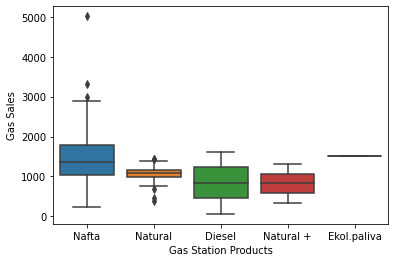

In [8]:
#boxplot
import seaborn as sns
import numpy as np

sns.boxplot(x="Gas Station Products", y="Gas Sales", data=result)

**Penjelasan 6.a**  
tentukan terlebih dahulu product dengan sales tertinggi (5)  
pilih 5 frame yang diambil dari langkah pertama  
pembacaan statistik   
Boxplot menggambarkan variable-variable statistic seperti nilai minimum, quartil 1, median(quartil 2),
quartil 3, nilai maksimum dan outlier (anomali)  
Nafta, ditemukan range minimum dan maksimum yang tinggi dan beberapa data anomali di atas nilai maksimum.  
Ekol.paliva secara visual posisi nilai minimum, quartil 1, median(quartil 2),
quartil 3, nilai maksimum berimpit yang dapat diinterpretasikan bahwa data konvergen.

In [9]:
tempdf

,Date,Time,CustomerID,CardID,GasStationID,ProductID,Amount,Price,Description
ProductID,,,,,,,,,
2,2012-01-01,00:18:00,41113,645177,363,2,93.7500,2038.5750,Nafta
2,2012-01-01,02:05:00,30766,496967,1083,2,132.1000,3002.6920,Nafta
2,2012-01-01,06:43:00,30940,570724,1101,2,86.3375,1845.4590,Nafta
2,2012-01-01,05:30:00,17693,509205,3671,2,86.2500,1907.3670,Nafta
2,2012-01-01,06:51:00,17693,467332,3671,2,65.0000,1437.4360,Nafta
...,...,...,...,...,...,...,...,...,...
8,2012-01-01,09:44:00,23752,531871,65,8,14.0875,343.6433,Natural +
8,2012-01-01,10:36:00,12581,582501,674,8,58.9375,1314.2360,Natural +
9,2012-01-01,08:36:00,47835,614287,422,9,45.5000,1070.6696,Diesel +


In [10]:
#visualisasi matrix korelasi dan trend perbandingan variable-variable tersebut.
corr = tempdf.corr()
corr.style.background_gradient(cmap='coolwarm')

,CustomerID,CardID,GasStationID,ProductID,Amount,Price
CustomerID,1.000000,0.294302,-0.263107,-0.257638,-0.006000,0.132046
CardID,0.294302,1.000000,-0.319677,-0.408249,0.225839,0.339132
GasStationID,-0.263107,-0.319677,1.000000,0.475271,-0.011378,-0.170848
ProductID,-0.257638,-0.408249,0.475271,1.000000,-0.004083,-0.332795
Amount,-0.006000,0.225839,-0.011378,-0.004083,1.000000,0.906962
Price,0.132046,0.339132,-0.170848,-0.332795,0.906962,1.000000


(0.0, 5318.448975817007)

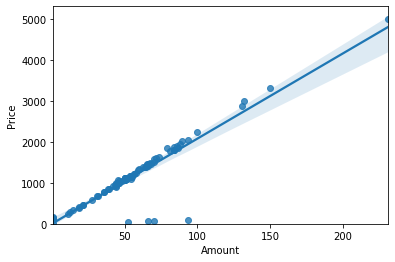

In [11]:
import matplotlib.pyplot as plt

# amount  vs price
sns.regplot(x="Amount", y="Price", data=tempdf)
plt.ylim(0,)

In [12]:
tempdf[['Amount','Price']].corr()

,Amount,Price
Amount,1.000000,0.906962
Price,0.906962,1.000000


**Penjelasan 6.b**  
terdapat hubungan linear antara price dan amount  
dari visual warna dan nilai, diperoleh semakin merah warna menunjukan semakin tinggi korelasi. Pembuktian disederhanakan menjadi amount vs price, didapat nilai mendekati 1 (0.906962)

In [13]:
#Buatlah line chart yang didalamnya terdapat variable jumlah sales(y) setiap jam (x).

tempdf

,Date,Time,CustomerID,CardID,GasStationID,ProductID,Amount,Price,Description
ProductID,,,,,,,,,
2,2012-01-01,00:18:00,41113,645177,363,2,93.7500,2038.5750,Nafta
2,2012-01-01,02:05:00,30766,496967,1083,2,132.1000,3002.6920,Nafta
2,2012-01-01,06:43:00,30940,570724,1101,2,86.3375,1845.4590,Nafta
2,2012-01-01,05:30:00,17693,509205,3671,2,86.2500,1907.3670,Nafta
2,2012-01-01,06:51:00,17693,467332,3671,2,65.0000,1437.4360,Nafta
...,...,...,...,...,...,...,...,...,...
8,2012-01-01,09:44:00,23752,531871,65,8,14.0875,343.6433,Natural +
8,2012-01-01,10:36:00,12581,582501,674,8,58.9375,1314.2360,Natural +
9,2012-01-01,08:36:00,47835,614287,422,9,45.5000,1070.6696,Diesel +


In [14]:
hh=tempdf.rename(columns={"Price": "Gas Sales"})


hh['gabung'] = hh['Date'] + ' ' + hh['Time']
hh['gabung'] = pd.to_datetime(hh['gabung'], errors='coerce')

hh['hours'] = hh['gabung'].dt.hour


hh = hh.set_index(['Date', 'hours']).sort_index()

hh=hh.drop(['CustomerID','CardID','ProductID','Time','GasStationID','gabung'],1)

hh1 = hh.groupby(level=['hours'])[['Amount','Gas Sales']].sum().sort_values(by=['hours'],ascending=True)
hh1

,Amount,Gas Sales
hours,,
0,208.8625,2599.3429
2,132.1000,3002.6920
4,180.8875,3987.8608
5,517.0850,9937.6425
6,332.2000,4738.5723
7,623.8125,13507.6480
8,958.0350,21341.5181
9,657.3000,14629.6689
10,1246.3000,27080.1069


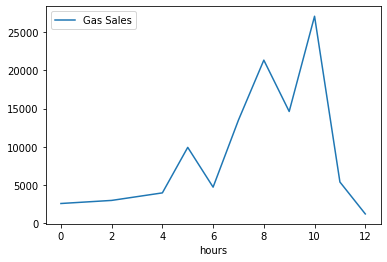

In [15]:
hh1.plot(y='Gas Sales', use_index=True)

plt.show()

**Penjelasan 6.c**  
dilakukan pengambilan jam (hiours) dari dataframe  
hours dijadikan index untuk memuat toatl sales
